In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

sb.set(style='white', context='talk', palette='Dark2')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 600
plt.rcParams["axes.grid.which"] = 'both'
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

# pal = sb.color_palette()
# hexcodes = pal.as_hex()
# newCodes = []
# for code in hexcodes:
#     newCodes.append(code)
#     newCodes.append(code)

/tmp/ipykernel_8817/3179427113.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, max(mus)+10)


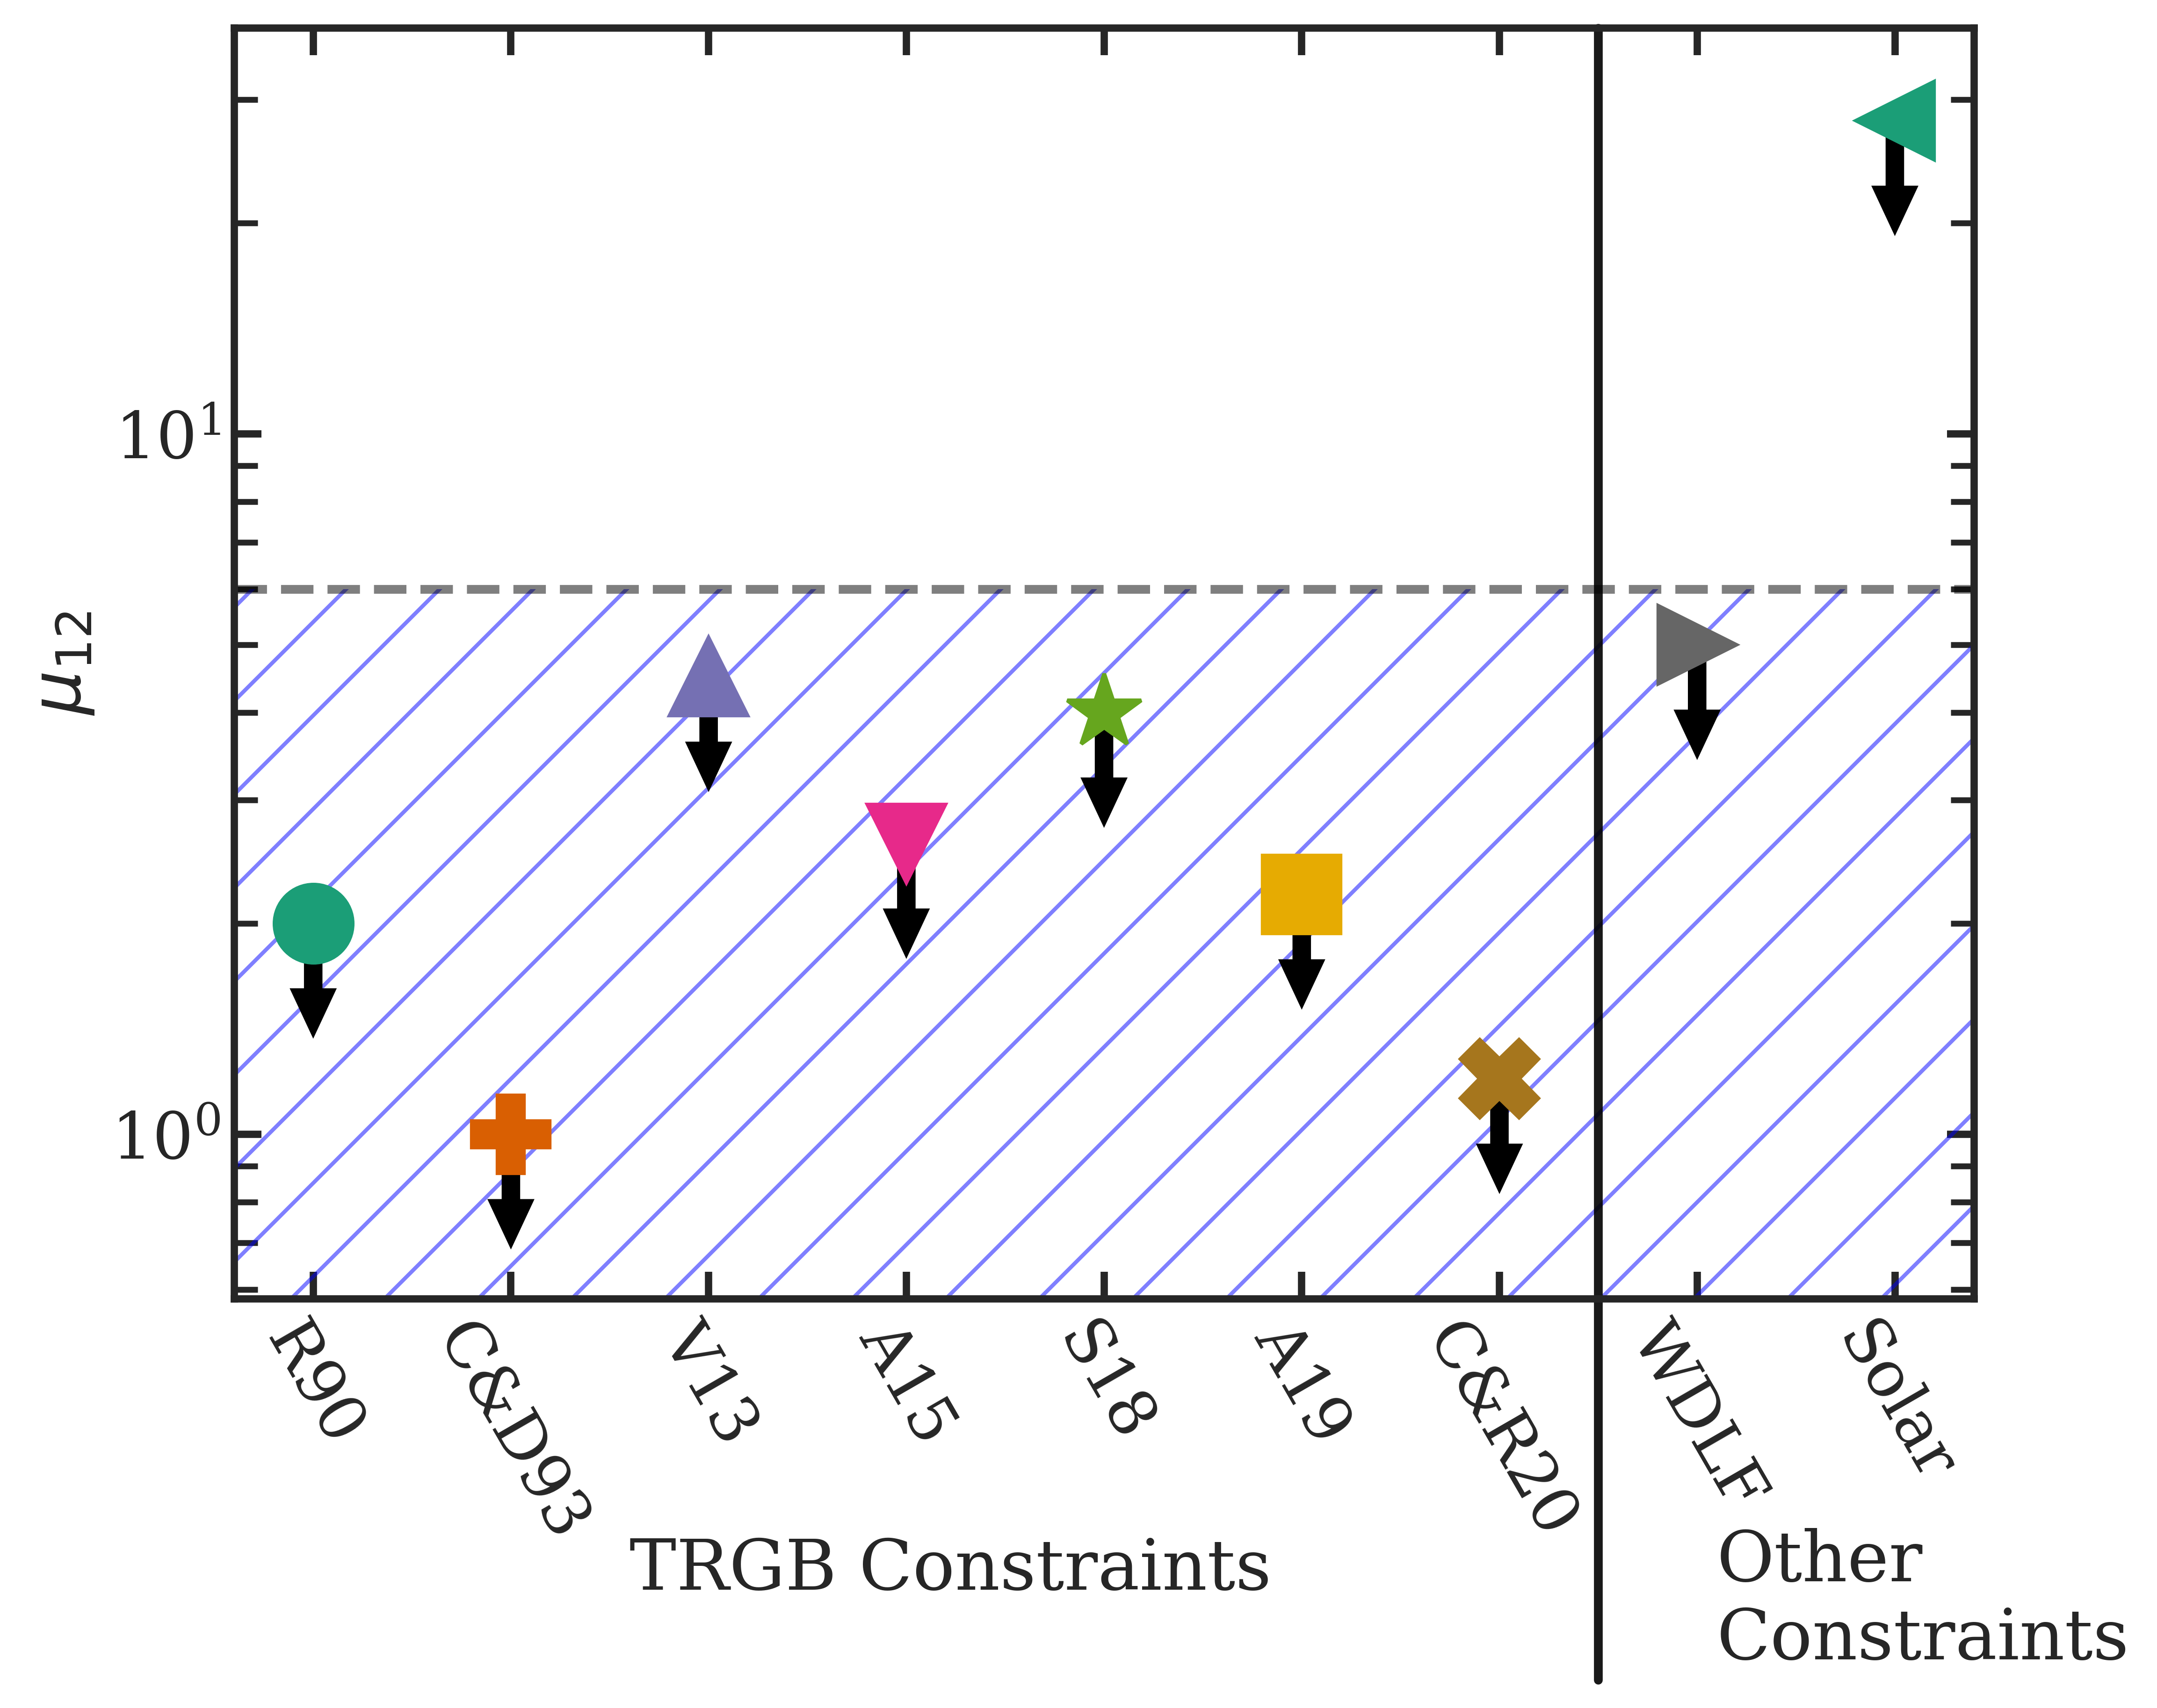

In [3]:
plotConstraint=True

fig, ax = plt.subplots(figsize=(8,6))

mus = [2, 1, 4.5, 2.6, 4, 2.2, 1.2, 5, 28]
err = [0, 0, 0, 0, 0, 0, 0, 0, 0]
# Capozzi & Raffelt (2020)
# Raffelt 1990
# Castellani & Degl’Innocenti (1993)
# Viaux et al (2013)
# Straniero et al (2018)
# Arceo-Dı́az et al (2015)
# Arceo-Dı́az et al (2019)
# WDLF : Bertolami & Miguel (2014)
# Solar : Agostini et al (2017) / Borexino Collab
# https://www.sciencedirect.com/science/article/pii/S0370269320304883
labels = ['R90', 'C&D93', 'V13', 'A15', 'S18', 'A19', 'C&R20', 'WDLF', 'Solar']
shapes = ['o', 'P', '^', 'v', '*', 's', 'X', '>', '<']

x = np.linspace(0, len(mus)+1, len(mus))
i=0
for ii in range(len(mus)):
    ax.errorbar([x[ii]], [mus[ii]], yerr=err[ii], xerr=0, 
                marker=shapes[ii], markersize=20, capsize=4)
    i+=1
    
    ax.arrow(x[ii], mus[ii], 0, -mus[ii]/5, width=0.08, 
             head_length=mus[ii]/10, color='k')
    i+=1
    
    if i > 2*7:
        i = 0

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=-60)
ax.set_ylabel(r'$\mu_{12}$')
ax.tick_params(which='major', length=7)
ax.set_yscale('log')
vertX = np.mean([x[-2], x[-3]])
ax.axvline(vertX, ymin=-0.3, ymax=1, clip_on=False, color='k', alpha=0.9, linestyle='-')
ax.text(2.0, 10**-0.65, 'TRGB Constraints')
ax.text(np.mean([x[-1], x[-2]])-0.5, 10**-0.75, 'Other\nConstraints')

if plotConstraint:
    ax.axhline(6, color='k', alpha=0.5, linestyle='--')
    ax.fill_between(np.linspace(-1, len(mus)+2, 100), 0*np.ones(100), 6*np.ones(100), 
                    facecolor="none", hatch="/", edgecolor="b", alpha=0.5, linewidth=0.0)
    ax.set_xlim(-0.5, len(mus)+1.5)
    ax.set_ylim(0, max(mus)+10)
    
fig.savefig('past_constraints.jpeg', transparent=False, bbox_inches='tight')